In [103]:
from __future__ import division
from math import *
import numpy as np
import sys
import os
from matplotlib.ticker import LogFormatter
from matplotlib.ticker import LogFormatterExponent
from matplotlib.ticker import LogFormatterSciNotation

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from shapely.geometry import Point, Polygon

import plotly.express as px
import ternary
import mpltern

/Users/oozdal/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning:

Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.



In [104]:
exec(open("/Users/oozdal/packages/ExpDATA/ExDATA.py").read())

In [105]:
df = pd.read_csv('/Users/oozdal/projects/MagMoment/Scan/data/NonUMSSMv4_Zp.csv', header=None,sep=" ")
df.columns =["MZp", "ZpWidthOverMass","BRZptoll","BRZptoqq","gpSUSY","DAEL","DAMU","Chi1","Chi2","Cha1","BRCha1toWChi1", "BRZptoCha1Cha1", "chi2", "Sv1", "TanBeta", \
           "Lambda","TLambda","vS", "NMIX11","NMIX12","NMIX13","NMIX14","NMIX15","NMIX16", "Se1", "M1", "M2", "M3", "M4", "Tep", "Tmup","TYe33", "WhoIsLSP", 
           "DAELDAMU_Sigma", "Ql1", "Ql2", "Qe1", "Qe2", "xsecpptoZp"]

# Let's see a few lines 
df.head()

,MZp,ZpWidthOverMass,BRZptoll,BRZptoqq,gpSUSY,DAEL,DAMU,Chi1,Chi2,Cha1,...,Tep,Tmup,TYe33,WhoIsLSP,DAELDAMU_Sigma,Ql1,Ql2,Qe1,Qe2,xsecpptoZp
0,7204.035,0.015277,0.082841,0.451902,0.461024,-8.034424e-13,4.400268e-10,1419.0180,3251.0620,3249.8520,...,-3204.901,4354.516,-59.1215,1000022,3sigma,-0.142857,-0.571429,-0.285714,0.142857,1.316754e-06
1,6813.462,0.017409,0.118714,0.281977,0.483480,-5.297234e-13,9.606797e-10,992.6819,-1003.7620,995.1132,...,-3026.312,5271.951,-285.3034,1000022,3sigma,-0.333333,-0.666667,0.000000,0.333333,2.653756e-06
2,6299.864,0.015051,0.054434,0.408094,0.471490,-1.077944e-12,7.365571e-10,455.8807,1681.9910,456.0103,...,-2638.551,8103.340,-80.1817,1000022,3sigma,0.333333,0.166667,0.166667,0.333333,2.287865e-05
3,7875.719,0.017424,0.041804,0.445308,0.471660,-6.679858e-13,1.129891e-09,757.6544,-777.1562,759.0685,...,2366.987,-5144.933,40.3030,1000022,3sigma,-0.333333,-0.111111,-0.111111,-0.333333,4.015107e-07
4,5058.067,0.014700,0.205433,0.265605,0.501219,-2.060117e-13,1.287903e-09,1713.4500,1713.8960,1714.5180,...,1887.456,-8119.648,-168.7672,1000022,3sigma,-0.250000,0.625000,0.625000,-0.250000,1.447154e-04


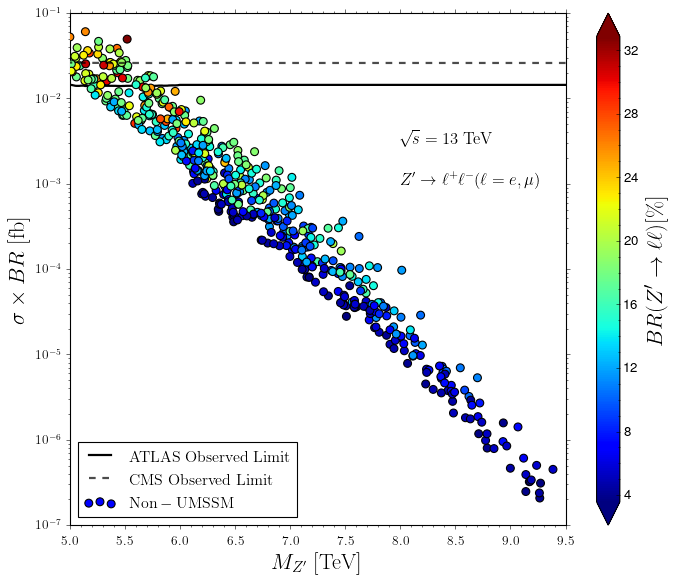

In [106]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')
col = np.array(df["BRZptoll"])*100


sc1 = ax1.scatter(np.array(df["MZp"])/1000., np.array(df["xsecpptoZp"]*1000*df["BRZptoll"]), 
                  c=col, cmap=cm, marker=".", zorder=50,label=r" $\rm {Non-UMSSM} $ ", s=200)

cbar1 = plt.colorbar(sc1, format = "%.0f", extend="both")
cbar1.set_label(r"$\displaystyle BR(Z^\prime \to \ell \ell) [\%] $ ", fontsize=20)

#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0} $",color='black', linewidth=2.0, zorder=30,alpha=0.7)
#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0.5 \%} $",color='blue', linewidth=2.0, zorder=20,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,label=r"$ {\rm\ ATLAS\ Observed\ Limit} $",color='black', linewidth=2.0, zorder=35,alpha=1.0)
    
    
    
#sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 0.6 \%} $",color='black', 
#               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit} $",color='black', 
               linewidth=2.0, zorder=55,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 5 \%} $",color='tab:green', 
#               linewidth=2.0, zorder=33,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 10 \%} $",color='gold', 
#               linewidth=2.0, zorder=32,alpha=0.7, linestyle="dashed")      
    
ax1.text(8.0, 3e-3, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(8.0, 1e-3, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $ ", size=15)
xmin = 5.0
xmax = 9.5
ymin = 1e-7
ymax = 1e-1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower left',frameon=True)
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)

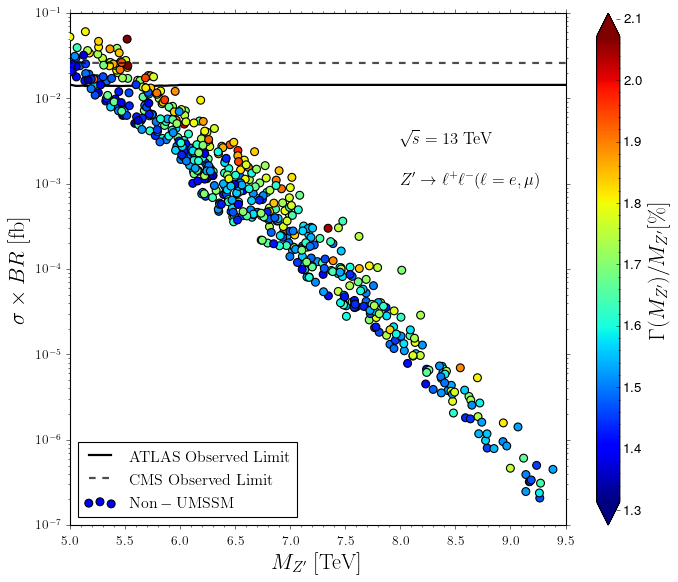

In [107]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')
col = np.array(df["ZpWidthOverMass"])*100

sc1 = ax1.scatter(np.array(df["MZp"])/1000., np.array(df["xsecpptoZp"]*1000*df["BRZptoll"]), 
                  c=col, cmap=cm, marker=".", zorder=50,label=r" $\rm {Non-UMSSM} $ ", s=200)

cbar1 = plt.colorbar(sc1, format = "%.1f", extend="both")
cbar1.set_label(r"$\displaystyle \Gamma(M_{Z^\prime})/M_{Z^\prime} [\%] $ ", fontsize=20)

#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0} $",color='black', linewidth=2.0, zorder=30,alpha=0.7)
#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0.5 \%} $",color='blue', linewidth=2.0, zorder=20,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,label=r"$ {\rm\ ATLAS\ Observed\ Limit} $",color='black', linewidth=2.0, zorder=35,alpha=1.0)
    

#sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 0.6 \%} $",color='black', 
#               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit} $",color='black', 
               linewidth=2.0, zorder=55,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 5 \%} $",color='tab:green', 
#               linewidth=2.0, zorder=33,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 10 \%} $",color='gold', 
#               linewidth=2.0, zorder=32,alpha=0.7, linestyle="dashed")      
    
ax1.text(8.0, 3e-3, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(8.0, 1e-3, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $ ", size=15)
xmin = 5.0
xmax = 9.5
ymin = 1e-7
ymax = 1e-1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower left',frameon=True)
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)

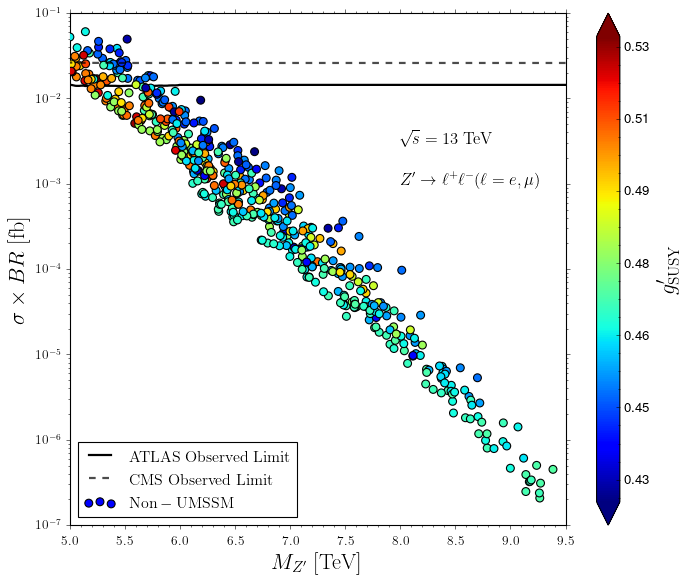

In [108]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')
col = np.array(df["gpSUSY"])

sc1 = ax1.scatter(np.array(df["MZp"])/1000., np.array(df["xsecpptoZp"]*1000*df["BRZptoll"]), 
                  c=col, cmap=cm, marker=".", zorder=50,label=r" $\rm {Non-UMSSM} $ ", s=200)

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1.set_label(r"$\displaystyle g^\prime_{\rm SUSY} $ ", fontsize=20)

#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width0/1000., observedxsection13TeVZpll139fb_xsec_width0,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0} $",color='black', linewidth=2.0, zorder=30,alpha=0.7)
#sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1over2/1000., observedxsection13TeVZpll139fb_xsec_width1over2,label=r"$ {\rm\ ATLAS\ Observed\ Limit\ \Gamma/M = 0.5 \%} $",color='blue', linewidth=2.0, zorder=20,alpha=0.7)
sc1 = ax1.plot(observedxsection13TeVZpll139fb_Zpmass_width1point2/1000., observedxsection13TeVZpll139fb_xsec_width1point2,label=r"$ {\rm\ ATLAS\ Observed\ Limit} $",color='black', linewidth=2.0, zorder=35,alpha=1.0)
    

#sc1 = ax1.plot((Zptoll_ObservedCMS_width06["MZp"])/1000., Zptoll_ObservedCMS_width06["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 0.6 \%} $",color='black', 
#               linewidth=2.0, zorder=35,alpha=0.7, linestyle="dashed")
sc1 = ax1.plot((Zptoll_ObservedCMS_width3["MZp"])/1000., Zptoll_ObservedCMS_width3["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit} $",color='black', 
               linewidth=2.0, zorder=55,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width5["MZp"])/1000., Zptoll_ObservedCMS_width5["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 5 \%} $",color='tab:green', 
#               linewidth=2.0, zorder=33,alpha=0.7, linestyle="dashed")
#sc1 = ax1.plot((Zptoll_ObservedCMS_width10["MZp"])/1000., Zptoll_ObservedCMS_width10["xsec"],label=r"$ {\rm\ CMS\ Observed\ Limit\  \Gamma/M = 10 \%} $",color='gold', 
#               linewidth=2.0, zorder=32,alpha=0.7, linestyle="dashed")      
    
ax1.text(8.0, 3e-3, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
ax1.text(8.0, 1e-3, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $ ", size=15)
xmin = 5.0
xmax = 9.5
ymin = 1e-7
ymax = 1e-1
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \sigma \times BR {\rm\ [fb]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower left',frameon=True)
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)

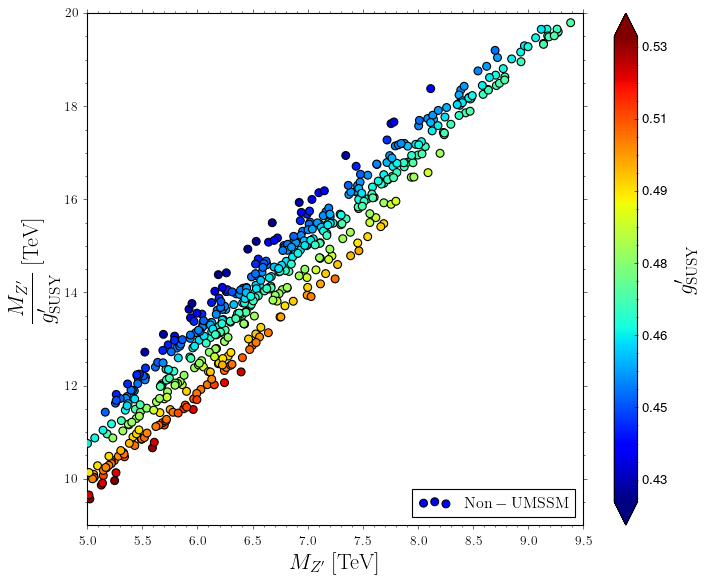

In [123]:
pyplot.rcParams['figure.figsize'] = (10.0, 8.0)

cm = plt.cm.get_cmap('jet')

fig, ax1 = plt.subplots()
fig.set_facecolor('white')
col = np.array(df["gpSUSY"])

sc1 = ax1.scatter(np.array(df["MZp"])/1000., np.array(df["MZp"]/df["gpSUSY"])/1000., 
                  c=col, cmap=cm, marker=".", zorder=50,label=r" $\rm {Non-UMSSM} $ ", s=200)

cbar1 = plt.colorbar(sc1, format = "%.2f", extend="both")
cbar1.set_label(r"$\displaystyle g^\prime_{\rm SUSY} $ ", fontsize=20)
     
    
#ax1.text(8.0, 3e-3, r"$\displaystyle \sqrt{s} = 13 {\rm\ TeV}$", size=15)
#ax1.text(8.0, 1e-3, r"$\displaystyle Z^\prime \to \ell^+ \ell^- (\ell = e, \mu) $ ", size=15)

xmin = 5.0
xmax = 9.5
ymin = 9.0
ymax = 20
ax1.axis([xmin,xmax,ymin,ymax])
plt.xlabel(r"$\displaystyle M_{Z^\prime} {\rm\ [TeV]}$", fontsize=20)
plt.ylabel(r"$\displaystyle \frac{M_{Z^\prime}}{g^\prime_{\rm SUSY}} {\rm\ [TeV]}$", fontsize=20)
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_minor_locator(MultipleLocator(0.1))
#ax1.yaxis.set_major_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(MultipleLocator(1))
#plt.yscale('log')
# Set both ticks to be outside
ax1.tick_params(which='both', direction='out')
#plt.legend(loc='best',frameon=True)
leg = plt.legend(loc='lower right',frameon=True)
leg.set_zorder(100)
#fig.savefig("plot/Zptoll_limit_withBR_139fb.png",dpi = 300)   # save the figure to file
#plt.close(fig)